In [1]:
# importing utility functions
import pandas as pd
import numpy as np
import os
import sys


%load_ext autoreload
%autoreload 2

module_path = os.path.abspath(os.path.join(os.pardir,'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from nb_modules import cleaning_mod as cl

In [2]:
# # setting options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Reading csv files to dataframes
building_use_df= pd.read_csv('../data/extracted/eq_data/csv_building_ownership_and_use.csv')
building_structure_df=  pd.read_csv('../data/extracted/eq_data/csv_building_structure.csv')

## Building Ownership and Use data

In [4]:
building_use_df.shape

(762106, 17)

The building structure dataset has 762106 observations and 18 features. Each row in the dataset represents a building that was surveyed, and gives information on the building type of ownership, number of families housed in the building and any secondary use status. 

In [5]:
# # Uncomment to preview data
# building_use_df.head()

In [6]:
# # Uncomment to preview data columns
# building_use_df.columns

In [7]:
# # Uncomment to see df info
building_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 17 columns):
building_id                      762106 non-null int64
district_id                      762106 non-null int64
vdcmun_id                        762106 non-null int64
ward_id                          762106 non-null int64
legal_ownership_status           762106 non-null object
count_families                   762104 non-null float64
has_secondary_use                762096 non-null float64
has_secondary_use_agriculture    762106 non-null int64
has_secondary_use_hotel          762106 non-null int64
has_secondary_use_rental         762106 non-null int64
has_secondary_use_institution    762106 non-null int64
has_secondary_use_school         762106 non-null int64
has_secondary_use_industry       762106 non-null int64
has_secondary_use_health_post    762106 non-null int64
has_secondary_use_gov_office     762106 non-null int64
has_secondary_use_use_police     762106 non-null int64
has_

The dataframe has 762106 obs with 17 features. There are few features with missing values. All the features are of numeric dtype except for `lega_ownership_status`. Need to look into this feature and possibly convert to numeric dtype

In [8]:
round(building_use_df['legal_ownership_status'].value_counts(normalize=True)*100,2)

Private          95.97
Public            2.52
Institutional     1.03
Other             0.48
Name: legal_ownership_status, dtype: float64

About 96% of the building structures in the data are of private ownership with 2.5% of public ownership and 1% belonging to institutions. On converting to numeric datatype, we will assign the labels in order as a range from 1 to 4.

In [9]:
cl.convert_to_num(building_use_df, 'legal_ownership_status', 'legal_ownership_status_num')

1    731387
2     19232
3      7823
4      3664
Name: legal_ownership_status_num, dtype: int64

In [10]:
# # Uncomment to to check for null values in columns
# building_use_df.isna().sum()

There are two features with missing values. `count_families` missing 2 values and `has_secondary_use` missing 10. The column `count_families` is a record of the number of families in a building. The column `has_secondary_use` is a flag variable that indicates if the building is used for any secondary purpose, according to the table information on the data source [site](https://eq2015.npc.gov.np/#/download)

In [11]:
# # Uncomment to check the rows of the column with NaN values
# building_use_df[building_use_df['count_families'].isna()]

In [12]:
building_use_df['count_families'].value_counts()

1.0     643418
0.0      71576
2.0      39753
3.0       5685
4.0       1215
5.0        302
6.0        104
7.0         27
8.0         15
9.0          8
11.0         1
Name: count_families, dtype: int64

The `Nan` values here could mean that no families live there like the 0 values that already exist in the data. Filling `Nan` here with 0 makes sense.

In [13]:
# # Uncomment to check the rows of the column with NaN values 
# building_use_df[building_use_df['has_secondary_use'].isna()]

In [14]:
building_use_df['has_secondary_use'].value_counts()

0.0    669732
1.0     92364
Name: has_secondary_use, dtype: int64

The `Nan` values here could mean that no the building has no secondary use. All the other secondary use fields have a 0 values corresponding to the Nan values of interest here. Filling `Nan` here with 0 makes sense, like the existing 0 values in the `has_secondary_use` column.

In [15]:
building_use_df['count_families'].fillna(value=0, inplace=True)
building_use_df['has_secondary_use'].fillna(value=0, inplace=True)

In [16]:
# # Uncomment to check for null values
# building_use_df.isnull().any()

All missing values and data type issues in the `building_use_df` have been taken care of.

In [17]:
# # Uncomment to check for descriptive statistics
# building_use_df.describe()

In [18]:
drop_list=['count_families']

In [19]:
building_use_df.drop(drop_list, axis=1, inplace=True)

In [20]:
building_use_df.describe()

,building_id,district_id,vdcmun_id,ward_id,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,legal_ownership_status_num
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607514e+11,25.767835,2582.688357,258274.277335,0.121196,0.071859,0.035090,0.008264,0.001161,0.000424,0.001164,0.000227,0.000186,0.000097,0.004490,1.060188
std,5.801855e+10,5.807555,581.172767,58117.348412,0.326355,0.258254,0.184006,0.090530,0.034057,0.020583,0.034096,0.015065,0.013649,0.009853,0.066858,0.325488
min,1.201010e+11,12.000000,1201.000000,120101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


Based in the descriptive statistics, there doesn't seem there is any problem in the range, main or standard deviations. The count is even across all variables i.e., no missing values

## Building Structure data

In [21]:
building_structure_df.shape

(762106, 31)

The building structure dataset has 762106 observations and 37 features. Each row in the dataset represents a building that was surveyed, and gives information on the building construction structure. 

In [22]:
# # Uncomment to preview Building Structure data
# building_structure_df.head()

In [23]:
# # Uncomment and run to see column labels in data
building_structure_df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [24]:
# # Uncomment and run to check for null
# building_structure_df.isna().sum()

There are 4 features in the dataset with missing values. `position` feature is missing 1 value, `plan_configuration` feature is also missing 1 value, `damage_grade` is missing 12 values and `technical_solution_proposed` is also missing 12 values.

In [25]:
# # Uncomment and run to check data info
# building_structure_df.info()

The building structure dataframe has 762106 observations and 31 features. There are 10 features as pandas object data type while the rest are of numeric dtype. The next steps will be to look at the object type features and explore if they should and can be converted to numeric dtype.

In [26]:
round(building_structure_df['land_surface_condition'].value_counts(normalize=True)*100,2)

Flat              82.89
Moderate slope    13.86
Steep slope        3.25
Name: land_surface_condition, dtype: float64

About 83% of the buildings in the dataset are on a flat land surface, while 14% of buildings sit on a moderate sloping land surface and about 3% buildings are on a steep sloping land surface. To convert to numeric datatype, we will assign the labels in order as a range from 1 to 3.

In [27]:
cl.convert_to_num(building_structure_df,'land_surface_condition', 'land_surface_condition_num')

1    631675
2    105640
3     24791
Name: land_surface_condition_num, dtype: int64

In [28]:
building_structure_df['foundation_type'].value_counts()

Mud mortar-Stone/Brick    628716
Bamboo/Timber              57473
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

In [29]:
cl.convert_to_num(building_structure_df,'foundation_type', 'foundation_type_num')

1    628716
2     57473
3     39245
4     32120
5      4552
Name: foundation_type_num, dtype: int64

In [30]:
round(building_structure_df['roof_type'].value_counts(normalize=True)*100,2)

Bamboo/Timber-Light roof    66.10
Bamboo/Timber-Heavy roof    28.05
RCC/RB/RBC                   5.85
Name: roof_type, dtype: float64

About 66% of the buildings in the dataset have a bamboo or light timber roofing, while 28% have a bamboo or heavy timber roofing and only about 6% have a modern structural designed roof type with RCC (Reinforced Cement Concrete or RBC (Reinforced Brick Concrete) or RB (Reinforced Brick).

In [31]:
cl.convert_to_num(building_structure_df,'roof_type', 'roof_type_num')

1    503748
2    213774
3     44584
Name: roof_type_num, dtype: int64

In [32]:
building_structure_df['ground_floor_type'].value_counts()

Mud            618217
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: ground_floor_type, dtype: int64

In [33]:
cl.convert_to_num(building_structure_df,'ground_floor_type', 'ground_floor_type_num')

1    618217
2     73149
3     66093
4      3594
5      1053
Name: ground_floor_type_num, dtype: int64

In [34]:
building_structure_df['other_floor_type'].value_counts()

TImber/Bamboo-Mud    486907
Timber-Planck        123635
Not applicable       118822
RCC/RB/RBC            32742
Name: other_floor_type, dtype: int64

In [35]:
cl.convert_to_num(building_structure_df,'other_floor_type', 'other_floor_type_num')

1    486907
2    123635
3    118822
4     32742
Name: other_floor_type_num, dtype: int64

In [36]:
# building_structure_df['condition_post_eq'].value_counts()
#removing this because-- cannot use post event data

In [37]:
# cl.convert_to_num(building_structure_df, 'condition_post_eq', 'condition_post_eq_num')
# #removing this because-- cannot use post event data

In [38]:
building_structure_df[building_structure_df['position'].isna()]

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,land_surface_condition_num,foundation_type_num,roof_type_num,ground_floor_type_num,other_floor_type_num
131652,212402000341,21,2107,210703,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN,1,1,1,1,2


In [39]:
building_structure_df['position'].value_counts()

Not attached       604453
Attached-1 side    129432
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

`position` gives the position of the building and `plan_configuration` gives the building plan configuration. For the null values in these columns, will look for rows with similar rows with similar values.

In [40]:
building_structure_df['plan_configuration'].value_counts()

Rectangular                        731257
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
Others                                518
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: plan_configuration, dtype: int64

In [41]:
# # Uncomment to preview data with condition
# building_structure_df[building_structure_df['position']=='Not attached'].head(2)

In [42]:
# # Uncomment to preview data with condition
# building_structure_df[building_structure_df['position']=='Attached-1 side'].head()

In [43]:
# # Uncomment to preview data with condition
# building_structure_df[building_structure_df['position']=='Attached-2 side'].head()

In [44]:
# # Uncomment to preview data with condition
# building_structure_df[building_structure_df['position']=='Attached-3 side'].head()

In [45]:
# # Uncomment to preview data with condition
# building_structure_df[building_structure_df['age_building'] >= 80].tail(10)

Based on similar buildings of around the same age, we can safely assign `position` Nan value as *Not attached* and `plan_configuration` Nan value as *Rectangular*.

In [46]:
# Assigning value to null and saving
building_structure_df['position'].fillna('Not attached', inplace=True)
building_structure_df['plan_configuration'].fillna('Rectangular', inplace= True)

In [47]:
cl.convert_to_num(building_structure_df,'position', 'position_num')
cl.convert_to_num(building_structure_df,'plan_configuration', 'plan_configuration_num')

1     731258
2      17576
3      10079
4        969
5        940
6        518
7        448
8        140
9         98
10        80
Name: plan_configuration_num, dtype: int64

In [48]:
building_structure_df['damage_grade'].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

To get a better understanding of the scale direction, need to preview row information for each grade

Based on the conditional data analysis above, the grade increase with the severity of the damage.

In [49]:
# building_structure_df['condition_post_eq'].value_counts()

In [50]:
# building_structure_df[building_structure_df['damage_grade'].isna()]

In investigating structure damage features in the damage assessment data, all the rows with *NaN* values for `damage_grade` showed no damage information for any of those buildings. It is safe to assign the *Nan* values as **Grade 1** to show minimal or no damage.

In [51]:
building_structure_df['damage_grade'].values

array(['Grade 3', 'Grade 5', 'Grade 2', ..., 'Grade 5', 'Grade 5',
       'Grade 5'], dtype=object)

In [52]:
building_structure_df['damage_grade'].values[building_structure_df['damage_grade'].isna()] = 'Grade 1'

In [53]:
building_structure_df['technical_solution_proposed'].values[building_structure_df['technical_solution_proposed'].isna()] = 'Minor repair'

In [54]:
building_structure_df.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

In [55]:
building_structure_df['technical_solution_proposed'].value_counts()

Reconstruction    470219
Major repair      129415
Minor repair      110617
No need            51855
Name: technical_solution_proposed, dtype: int64

In [56]:
target_df= building_structure_df[['damage_grade','technical_solution_proposed']]
solution_list = building_structure_df['technical_solution_proposed'].value_counts().index

In [57]:
for sol in solution_list:
    print('Grade proportion for {}'.format(sol))
    print(target_df[target_df['technical_solution_proposed']== sol]['damage_grade'].value_counts())

Grade proportion for Reconstruction
Grade 5    275580
Grade 4    166446
Grade 3     25598
Grade 2      2395
Grade 1       200
Name: damage_grade, dtype: int64
Grade proportion for Major repair
Grade 3    101292
Grade 4     17213
Grade 2     10383
Grade 1       384
Grade 5       143
Name: damage_grade, dtype: int64
Grade proportion for Minor repair
Grade 2    73991
Grade 1    26958
Grade 3     9466
Grade 4      173
Grade 5       29
Name: damage_grade, dtype: int64
Grade proportion for No need
Grade 1    51285
Grade 2      488
Grade 3       56
Grade 5       14
Grade 4       12
Name: damage_grade, dtype: int64


The source [site](http://eq2015.npc.gov.np/docs/#/faqs/faqs?id=what-would-be-the-best-general-proxy-for-overall-building-damage) FAQs section on , *"What would be the best general proxy for “overall building damage”?* states that the suveyors were given the following general guidance to use to grade a building damage.

1. Grade 1 : Hairline to thin cracks in plaster on few walls, falling of plaster bits in limited parts, fall of loose stone from upper part of the building in a few cases, only architectural repairs needed.

2. Grade 2 : Cracks in many walls, falling of plaster in last bits over large area, damage to non structural parts like chimney, projecting cornices. The load carrying capacity of the building is not reduced appreciably.

3. Grade 3 : Large and extensive cracks in most walls, collapse of small portion of non load-bearing walls, roof tile detachment, tilting or failing of chimneys, failure of individual non-structural elements such as partition/gable walls, delamination of stone/adobe walls, load carrying capacity of structure is partially reduced and significant structural repair is required.

4. Grade 4 : Large gaps occur in walls, walls collapse, partial structural failure of floor/roof, building takes a dangerous state.

5. Grade 5 : Total or near collapse of the building

So if **Grade 5** is a building of total or near collapse it would make sense for the technical solution to be a proposition of `Reconstruction` or at the least `Major Repairs`. However, in the data we see that there are several buildings (41 in total) that are given a proposition of either Minor Repairs or No repairs needed at all even. 

Similarly if a **Grade 1** building is one with hairline cracks, falling plaster bits, one that is suggestive of only architectual repairs needed. Then, you could expect the technical solution proposed to be of Minor repairs. However, some **Grade 1** graded buildings  have been proposed to be reconstructed or go through major repairs.

So, each proposition of `Reconstruction` or, `Major repairs` or, `Minor repairs` or, `No need` have varying degrees but some composition of building damage grades. One reason for the variations in the observed data could be because of many perceptions (multiple suveyors) being involved in the decisions to how damaged and what repair across survey regions. Also, since the surveyors had to eyeball their damage grades and also the proposed technical solutions it makes sense that their grading is so varied across what solution was proposed.

There is more to explore here.

In [58]:
building_structure_df['target']= building_structure_df['damage_grade'].map({'Grade 1': 1,
                                                                           'Grade 2': 1,
                                                                           'Grade 3': 2,
                                                                           'Grade 4': 3,
                                                                           'Grade 5': 3})

Reducing the number of classes that a model will have to classify between, helps build more efficient models. With having created a three class target variable, we will drop the feature `damage_grade` from the featues set.

In [59]:
building_structure_df['target'].dtype

dtype('int64')

In [60]:
drop_list = ['damage_grade','count_floors_post_eq','condition_post_eq', 'height_ft_post_eq', 'technical_solution_proposed']

In [61]:
building_structure_df.drop(drop_list, axis=1, inplace=True)

In [62]:
building_structure_df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,land_surface_condition_num,foundation_type_num,roof_type_num,ground_floor_type_num,other_floor_type_num,position_num,plan_configuration_num,target
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607514e+11,25.767835,2582.688357,258274.277335,2.087783,24.326405,406.672576,16.049372,0.042401,0.800271,0.035121,0.015815,0.022961,0.071525,0.258766,0.080482,0.039794,0.016386,0.012026,1.203675,1.328735,1.397506,1.289105,1.602941,1.245612,1.068446,2.385151
std,5.801855e+10,5.807555,581.172767,58117.348412,0.655101,65.043704,226.779371,5.493878,0.201502,0.399797,0.184086,0.124761,0.149780,0.257701,0.437957,0.272039,0.195474,0.126955,0.109001,0.476709,0.805117,0.597074,0.651036,0.899447,0.515966,0.407855,0.820162
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,9.000000,280.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,16.000000,358.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,27.000000,470.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,999.000000,5000.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,3.000000,5.000000,4.000000,4.000000,10.000000,3.000000


According to the descriptive statistics, the oldest building is 999 years old and the newest is 0 years old. This will have to be checked.

In [63]:
print('Number of 999 year old :',building_structure_df.loc[building_structure_df['age_building']== 999]['age_building'].count())
print('Number of 99 year old :',building_structure_df.loc[building_structure_df['age_building']== 99]['age_building'].count())

Number of 999 year old : 3145
Number of 99 year old : 482


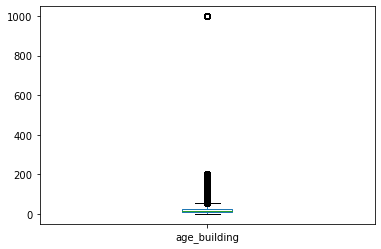

In [64]:
building_structure_df['age_building'].plot(kind='box')

It seems that age 999 year might be an outlier. This may actually be 99 year old buildings.

In [65]:
building_structure_df.loc[(building_structure_df['age_building']== 999), 'age_building']=99

### Reading pickled geotechnical risk data
Whether a building faces any geotechnical risk speaks on the severity of damage a building faces from an earthquake. This set of features may be important in informing on the damage grade of the building and this will be included in the final working dataframe.

In [66]:
geotech_risk_df = pd.read_pickle('../data/pickles/geotech_risk_df.pkl')

Combining geotech_risk_df on 'id' with building_structure_df.

In [67]:
new_df = pd.merge(building_structure_df, geotech_risk_df, how= 'left', 
                  on = ['building_id', 'district_id', 'vdcmun_id', 'ward_id'], validate= 'one_to_one')


In [68]:
new_df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'land_surface_condition_num', 'foundation_type_num', 'roof_type_num',
       'ground_floor_type_num', 'other_floor_type_num', 'position_num',
       'plan_configuration_num', 'target', 'has_geotechnical_risk',
       'has_geotechnical_risk_land_settlement',
  

In [69]:
building_df = pd.merge(new_df,building_use_df, how= 'left', 
                  on = ['building_id', 'district_id', 'vdcmun_id', 'ward_id'], validate= 'one_to_one')

Below I am isolating the true ward ids and the municipality ids.

In [70]:
building_df['ward_id'] = building_df['ward_id']-(building_df['vdcmun_id']*100)

building_df['vdcmun_id'] = building_df['vdcmun_id']-(building_df['district_id']*100)

## Pickle the final cleaned data set

In [71]:
building_df.to_pickle("../data/pickles/building_df.pkl")